<a href="https://colab.research.google.com/github/christakahashi/ECE447/blob/master/lectures/matrix_exponentials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ECE 447: Matrix Exponentials
===
In  which we solve linear ODEs once and for all.

Updated by 
 Dr. Chris Takahashi

Authored by Prof. Eric Klavins &copy; 2019, University of Washington


In [0]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *

%matplotlib inline

#comment out for light mode
plt.style.use('dark_background')


try: 
  import google.colab #test for colab
  import IPython
  def setup_typeset():
    """MathJax initialization for the current cell.
    
    This installs and configures MathJax for the current output.
    """
    IPython.display.display(IPython.display.HTML('''
        <script src="https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=TeX-AMS_HTML-full,Safe&delayStartupUntil=configured"></script>
        <script>
          (() => {
            const mathjax = window.MathJax;
            mathjax.Hub.Config({
            'tex2jax': {
              'inlineMath': [['$', '$'], ['\\(', '\\)']],
              'displayMath': [['$$', '$$'], ['\\[', '\\]']],
              'processEscapes': true,
              'processEnvironments': true,
              'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
              'displayAlign': 'center',
            },
            'HTML-CSS': {
              'styles': {'.MathJax_Display': {'margin': 0}},
              'linebreaks': {'automatic': true},
              // Disable to prevent OTF font loading, which aren't part of our
              // distribution.
              'imageFont': null,
            },
            'messageStyle': 'none'
          });
          mathjax.Hub.Configured();
        })();
        </script>
        '''))
  def custom_latex_printer(exp,**options):
      setup_typeset()
      return printing.latex(exp,**options)
  init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)
except:
  init_printing(use_latex='mathjax')

The General Solution to $\dot x = Ax$
===

When $A \in \mathbb{R}^{n\times n}$, then the we define $e^{At}$ by

$$
e^{At} \triangleq I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \dots
$$

It turns out that 

$$
x(t) = e^{At}x(0)
$$

is the solution to $\dot x = Ax$. This is because

\begin{align}
\frac{d}{dt}e^{At}x(0) & = 
\frac{d}{dt}\left(I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \dots\right)x(0) \\
 & = \left(0 + A + A^2 t + \frac{A^3t^2}{2!} + \dots\right)x(0) \\
 & = A \left(I + At + + \frac{(At)^2}{2!} + \dots \right)x(0) \\
 &= A e^{At} x(0) \\
 & = A x(t).
\end{align}

We next explore what $e^{At}$ looks like for various types of matrices.

Diagonalizable Matrices
===

If $A$ is diagonalizable, then $A = P D P^{-1}$ for some $P$ and $D$. In this case,

\begin{align}
e^{At} & = e^{PDP^{-1}t} \\
       & = I + PDP^{-1}t + \frac{(PDP^{-1}t)^2}{2!} + \dots \\
       & = I + PDP^{-1}t + \frac{PDP^{-1}PDP^{-1}t^2}{2!} + \dots \\
       & = I + PDP^{-1}t + \frac{PD^2P^{-1}t^2}{2!} + \dots \\
       & = P \left(I + Dt + \frac{D^2t^2}{2!} + \dots \right)P^{-1} \\
       & = P e^{Dt} P^{-1}.
\end{align}

Now, since $D$ is diagonal and of the form

$$
D = \begin{pmatrix}
\lambda_1 & 0 \\
0 & \lambda_2
\end{pmatrix}
$$

it is clear that 

$$
e^{Dt} = \begin{pmatrix}
e^{\lambda_1t} & 0 \\
0 & e^{\lambda_2t}
\end{pmatrix} .
$$

Thus, figuring out $e^{At}$ is just matrix multiplication using $P e^{Dt} P^{-1}$.

<span style="color: darkorange; border: 1pt solid darkorange; padding: 8px">
**NOTE**: In general, $e^{At}$ is **not** just the elementwise exponentials of the entries of $A$. 
</span>
 

# Example: Real Eigenvalues

Take,

$$A = \begin{pmatrix} -2 & -2 \\ -1 &-3 \end{pmatrix}$$

In [2]:
# Compute e^{At} using diagonalization method
var("t")
A = Matrix([[-2,-2],[-1,-3]])
P,D = A.diagonalize()
display(P)
display(D)


⎡1  -2⎤
⎢     ⎥
⎣1  1 ⎦

⎡-4  0 ⎤
⎢      ⎥
⎣0   -1⎦

In [3]:
eDt = Matrix([
    [exp(D[0,0]*t), 0], 
    [0, exp(D[1,1]*t)]
])
eDt


⎡ -4⋅t     ⎤
⎢ℯ       0 ⎥
⎢          ⎥
⎢        -t⎥
⎣  0    ℯ  ⎦

In [4]:
eAt = P*eDt*P.inv()
eAt.simplify()
#display D and the matrix exponential
eAt

⎡⎛   3⋅t    ⎞  -4⋅t  ⎛     3⋅t    ⎞  -4⋅t⎤
⎢⎝2⋅ℯ    + 1⎠⋅ℯ      ⎝- 2⋅ℯ    + 2⎠⋅ℯ    ⎥
⎢──────────────────  ────────────────────⎥
⎢        3                    3          ⎥
⎢                                        ⎥
⎢⎛   3⋅t    ⎞  -4⋅t    ⎛ 3⋅t    ⎞  -4⋅t  ⎥
⎢⎝- ℯ    + 1⎠⋅ℯ        ⎝ℯ    + 2⎠⋅ℯ      ⎥
⎢──────────────────    ────────────────  ⎥
⎣        3                    3          ⎦

In [5]:
# Compute e^{At} using sympy's exp which, works on 
# matrices and probably does the same thing
w = exp(A*t).simplify()
w

⎡⎛   3⋅t    ⎞  -4⋅t  ⎛     3⋅t    ⎞  -4⋅t⎤
⎢⎝2⋅ℯ    + 1⎠⋅ℯ      ⎝- 2⋅ℯ    + 2⎠⋅ℯ    ⎥
⎢──────────────────  ────────────────────⎥
⎢        3                    3          ⎥
⎢                                        ⎥
⎢⎛   3⋅t    ⎞  -4⋅t    ⎛ 3⋅t    ⎞  -4⋅t  ⎥
⎢⎝- ℯ    + 1⎠⋅ℯ        ⎝ℯ    + 2⎠⋅ℯ      ⎥
⎢──────────────────    ────────────────  ⎥
⎣        3                    3          ⎦

In [9]:
# Find the solution to x' = Ax for generic initial conditions
var("x10 x20")
x = eAt*Matrix([[x10],[x20]])
x.simplify()
x

⎡⎛    ⎛   3⋅t    ⎞         ⎛ 3⋅t    ⎞⎞  -4⋅t⎤
⎢⎝x₁₀⋅⎝2⋅ℯ    + 1⎠ - 2⋅x₂₀⋅⎝ℯ    - 1⎠⎠⋅ℯ    ⎥
⎢───────────────────────────────────────────⎥
⎢                     3                     ⎥
⎢                                           ⎥
⎢ ⎛      ⎛ 3⋅t    ⎞       ⎛ 3⋅t    ⎞⎞  -4⋅t ⎥
⎢ ⎝- x₁₀⋅⎝ℯ    - 1⎠ + x₂₀⋅⎝ℯ    + 2⎠⎠⋅ℯ     ⎥
⎢ ───────────────────────────────────────── ⎥
⎣                     3                     ⎦

In [18]:
# Find the solution to x' = Ax when x(0) = (1,-2)
x = eAt*Matrix([1,-2])
x.simplify()
x

⎡     -t    -4⋅t  ⎤
⎢  2⋅ℯ   - ℯ      ⎥
⎢                 ⎥
⎢ ⎛ 3⋅t    ⎞  -4⋅t⎥
⎣-⎝ℯ    + 1⎠⋅ℯ    ⎦

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


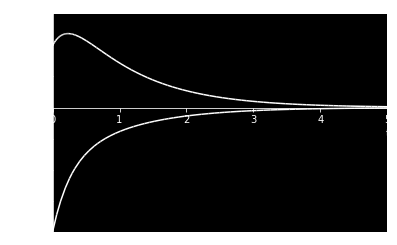

In [19]:
# Note, we are using sympy's plotting.plot method, and not numpy's method
plotting.plot(x[0],x[1],(t,0,5),ylim=[-2,1.5]);

Sympy's symbols cannot be used with numpy.plt directly. First, you have to convert them into functions. To do this, you use `lambdify`. For example, to turn the expression $e^{-t}$ into a function that numpy can use, you do

In [0]:
f = lambdify(t,exp(-t), modules=['numpy'])

You can now evaluate f for any t. For example:

In [16]:
print(f(0))
print(f(1))
print(f(2))

1.0
0.36787944117144233
0.1353352832366127


So, to plot the above solution to $\dot x = Ax$, we can do the following:

In [30]:
# Using numpy. 
# First, turn xt into functions
x_fn = lambdify(t,x, modules=['numpy'])
print (x_fn(np.array([5,10,15])))

[[[ 1.34758919e-02  9.07998595e-05  6.11804641e-07]]

 [[-6.73794906e-03 -4.53999298e-05 -3.05902321e-07]]]


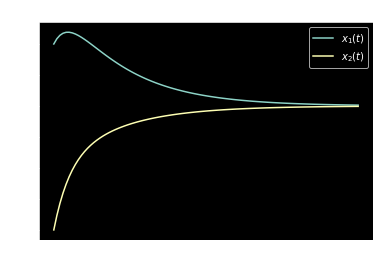

In [31]:
# then plot
tvals = np.linspace(0,5,100)
plt.plot(tvals,x_fn(tvals)[0,0], label="$x_1(t)$")
plt.plot(tvals,x_fn(tvals)[1,0], label="$x_2(t)$")
plt.xlabel("$t$")
plt.title("example linear system response")
plt.legend();

Example: Imaginary Eigenvalues
---
As another example, consider a matrix with complex eigenvalues. This can be diagonalized, you just don't get a real matrix. 

In [32]:
A = Matrix([[-1,1],[-1,-1]])
P,D = A.diagonalize()
D

⎡-1 - ⅈ    0   ⎤
⎢              ⎥
⎣  0     -1 + ⅈ⎦

In [33]:
P

⎡ⅈ  -ⅈ⎤
⎢     ⎥
⎣1  1 ⎦

In [34]:
eAt=P*exp(D*t)*P.inv()
eAt

⎡    t⋅(-1 - ⅈ)    t⋅(-1 + ⅈ)        t⋅(-1 - ⅈ)      t⋅(-1 + ⅈ)⎤
⎢   ℯ             ℯ               ⅈ⋅ℯ             ⅈ⋅ℯ          ⎥
⎢   ─────────── + ───────────     ───────────── - ─────────────⎥
⎢        2             2                2               2      ⎥
⎢                                                              ⎥
⎢     t⋅(-1 - ⅈ)      t⋅(-1 + ⅈ)     t⋅(-1 - ⅈ)    t⋅(-1 + ⅈ)  ⎥
⎢  ⅈ⋅ℯ             ⅈ⋅ℯ              ℯ             ℯ            ⎥
⎢- ───────────── + ─────────────    ─────────── + ───────────  ⎥
⎣        2               2               2             2       ⎦

In [35]:
eAt = eAt.simplify() # Uses cos(t) = (e^{it} + e^{-it})/2
eAt

⎡ -t           -t       ⎤
⎢ℯ  ⋅cos(t)   ℯ  ⋅sin(t)⎥
⎢                       ⎥
⎢  -t          -t       ⎥
⎣-ℯ  ⋅sin(t)  ℯ  ⋅cos(t)⎦

In [36]:
x = eAt*Matrix([1,-2]) # e^{At} * (initial condition)
x.simplify()

⎡                      -t⎤
⎢(-2⋅sin(t) + cos(t))⋅ℯ  ⎥
⎢                        ⎥
⎢                      -t⎥
⎣-(sin(t) + 2⋅cos(t))⋅ℯ  ⎦

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


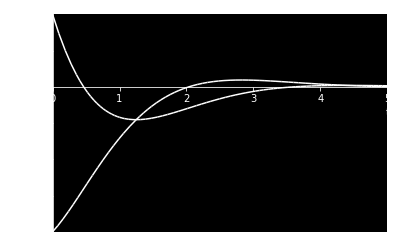

In [38]:
plotting.plot(x[0],x[1],(t,0,5),ylim=[-2,1]);

Jordan Form
===

Not all matrices can be diagonalized. This is because the matrix of eignvectors, which we use for $P$ and $P^{-1}$ may not be invertible. However, all matrices can be put into *Jordan* form. 

A *Jordan Block* of size $m$ and value $\lambda$ is a matrix
$J_m(\lambda)$ having the value $\lambda$ repeated along the main
diagonal, ones along the superdiagonal and zeros everywhere else. For
example:

$$
J_2(4) = \begin{pmatrix} 
4 & 1 \\
0 & 4
\end{pmatrix} \;\;\;\;\;\;\; \mathrm{and}\;\;\;\;\;\;\;
J_4(-\frac{1}{2}) = \begin{pmatrix}
-\frac{1}{2} & 1 & 0 & 0 \\
0 & -\frac{1}{2} & 1 & 0 \\
0 & 0 & -\frac{1}{2} & 1 \\
0 & 0 & 0 & -\frac{1}{2}
\end{pmatrix} .
$$

A Matrix is in *Jordan Form* is a block diagonal matrix consisting of several Jordan blocks. For example, 
we can form a Jordan Form from two copies of $J_2(4)$ and one copy of $J_4(-\frac{1}{2})$ as follows.
$$
J = \begin{pmatrix}
J_2(4) & 0 & 0 \\
0 & J_2(4) & 0 \\
0&  0 & J_4(-\frac{1}{2})
\end{pmatrix} = \begin{pmatrix}
4 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 4 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 4 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 4 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -\frac{1}{2} & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -\frac{1}{2} & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & -\frac{1}{2} & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -\frac{1}{2} \\
\end{pmatrix} .
$$

Notice that the eigenvalues and eigenvectors of a matrix in Jordan
Form can be read off without your having to do any work.
- The eigenvalues are along the main diagonal (this is true of any upper-triangular matrix).
- Eigenvectors can be found on the columns at the beginning of each block.

For example, in the above form $J$, we have the eigenvalues $\lambda =
1$ with multiplicity $4$ and $\lambda = \frac{1}{2}$ with multiplicity
$4$. Furthermore, there are two eigenvectors associated with $\lambda =
1$, namely

$$
v_1 = \begin{pmatrix}
1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
\end{pmatrix}, \;\;
v_2 = \begin{pmatrix}
0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
\end{pmatrix}
$$

and one eigenvector associated with the eigenvalue $\lambda = - \frac{1}{2}$, namely

$$
v_3 = \begin{pmatrix}
0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0
\end{pmatrix} .
$$

These choices are not unique: any two basis vectors for $\mathrm{span} ( v_1, v_2 )$ can
be chosen as the eigenvectors for $\lambda = 1$ and any non-zero
scalar multiple of $v_3$ can be chosen as the eigenvector for $\lambda
= - \frac{1}{2}$.

**Theorem**: Any matrix can be put into Jordan Form.

We will not prove this statement in this course. However, [here](https://github.com/klavins/ECE447/blob/master/lectures/jordan-form.pdf) is a proof you can read if you are interested. 

You can use `sympy` to put matrices into Jordan form. For example:

In [0]:
A = Matrix([
[ 5,  4,  2,  1],
[ 0,  1, -1, -1],
[-1, -1,  3,  0],
[ 1,  1, -1,  2]])

P,J = A.jordan_form()

In [0]:
J

⎡1  0  0  0⎤
⎢          ⎥
⎢0  2  0  0⎥
⎢          ⎥
⎢0  0  4  1⎥
⎢          ⎥
⎣0  0  0  4⎦

In [0]:
P

⎡-1  1   1   1⎤
⎢             ⎥
⎢1   -1  0   0⎥
⎢             ⎥
⎢0   0   -1  0⎥
⎢             ⎥
⎣0   1   1   0⎦

In [0]:
P*J*P.inv()

⎡5   4   2   1 ⎤
⎢              ⎥
⎢0   1   -1  -1⎥
⎢              ⎥
⎢-1  -1  3   0 ⎥
⎢              ⎥
⎣1   1   -1  2 ⎦

Matrix Exponential of a Jordan Block
===

The matrix exponential of a diagonal matrix is straightfoward to compute. However, with a Jordan block, the extra ones on the upper diagonal introduce new terms. Here is an example of what happens with a simple Jordan Block

$$
J = \begin{pmatrix}
-1 & 1 \\
 0 & -1
\end{pmatrix}
$$

This matrix has a repeated eigenvalue (-1) and is not diagonalizable due to a one dimensional eigenspace.

Using the definition of the matrix exponential, we compute:

$$
J^2 = \begin{pmatrix}
1 & -2 \\
 0 & 1
\end{pmatrix}
$$

and

$$
J^2 = \begin{pmatrix}
-1 & 3 \\
 0 & -1
\end{pmatrix} .
$$

You can see a pattern emerging. We have

$$
J^n = \begin{pmatrix}
(-1)^{n-1} & n(-1)^n \\
 0 & (-1)^{n-1}
\end{pmatrix} .
$$

So the $1,1$ and $2,2$ entries of $e^{Jt}$ are 

$$
1 + -t + \frac{t^2}{2!} - \frac{t^3}{3!} + \frac{t^4}{4!} + ... = e^{-t}.
$$

And the $1,2$ entry is

\begin{align}
 & = 0 + t - 2\frac{t^2}{2!} + 3\frac{t^3}{3!} - 4\frac{t^4}{4!} + ... \\ 
 & = t \left(\ 1 - t + \frac{t^2}{2!} - \frac{t^3}{3!} + ... \right) \\
 & = t e^{-t}.
\end{align}

Thus,

$$
e^{Jt} = \begin{pmatrix}
e^{-t} & t e^{-t} \\
0      & e^{-t}
\end{pmatrix} .
$$

More generally, you can compute the matrix exponential larger Jordan blocks similarly to get

In [0]:
var("a")
J = Matrix([
    [a,1,0],
    [0, a,1],
    [0, 0 , a]
])
exp(J*t)

⎡               2  a⋅t⎤
⎢ a⋅t     a⋅t  t ⋅ℯ   ⎥
⎢ℯ     t⋅ℯ     ───────⎥
⎢                 2   ⎥
⎢                     ⎥
⎢        a⋅t      a⋅t ⎥
⎢ 0     ℯ      t⋅ℯ    ⎥
⎢                     ⎥
⎢                a⋅t  ⎥
⎣ 0      0      ℯ     ⎦

In [0]:
J = Matrix([
    [a,1,0,0],
    [0,a,1,0],
    [0,0,a,1],
    [0,0,0,a]
])
exp(J*t)

⎡               2  a⋅t   3  a⋅t⎤
⎢ a⋅t     a⋅t  t ⋅ℯ     t ⋅ℯ   ⎥
⎢ℯ     t⋅ℯ     ───────  ───────⎥
⎢                 2        6   ⎥
⎢                              ⎥
⎢                        2  a⋅t⎥
⎢        a⋅t      a⋅t   t ⋅ℯ   ⎥
⎢ 0     ℯ      t⋅ℯ      ───────⎥
⎢                          2   ⎥
⎢                              ⎥
⎢                a⋅t       a⋅t ⎥
⎢ 0      0      ℯ       t⋅ℯ    ⎥
⎢                              ⎥
⎢                         a⋅t  ⎥
⎣ 0      0        0      ℯ     ⎦

And to compute the matrix exponential of an arbitrary matrix $A$, you just use the fact that there exist $P$ and $J$ in Jordan Form with $A = PJP^{-1}$. For example,

In [0]:
A = Matrix([
[ 5,  4,  2,  1],
[ 0,  1, -1, -1],
[-1, -1,  3,  0],
[ 1,  1, -1,  2]])

P,J = A.jordan_form()

In [0]:
J

⎡1  0  0  0⎤
⎢          ⎥
⎢0  2  0  0⎥
⎢          ⎥
⎢0  0  4  1⎥
⎢          ⎥
⎣0  0  0  4⎦

In [0]:
exp(J*t)

⎡ t                    ⎤
⎢ℯ    0     0      0   ⎥
⎢                      ⎥
⎢     2⋅t              ⎥
⎢0   ℯ      0      0   ⎥
⎢                      ⎥
⎢           4⋅t     4⋅t⎥
⎢0    0    ℯ     t⋅ℯ   ⎥
⎢                      ⎥
⎢                  4⋅t ⎥
⎣0    0     0     ℯ    ⎦

In [0]:
P*exp(J*t)*P.inv()

⎡   4⋅t    4⋅t     4⋅t    4⋅t    t      4⋅t    2⋅t    t     2⋅t    t ⎤
⎢t⋅ℯ    + ℯ     t⋅ℯ    + ℯ    - ℯ    t⋅ℯ    + ℯ    - ℯ     ℯ    - ℯ  ⎥
⎢                                                                    ⎥
⎢                        t                 2⋅t    t          2⋅t    t⎥
⎢      0                ℯ               - ℯ    + ℯ        - ℯ    + ℯ ⎥
⎢                                                                    ⎥
⎢       4⋅t              4⋅t               4⋅t    4⋅t                ⎥
⎢   -t⋅ℯ             -t⋅ℯ             - t⋅ℯ    + ℯ             0     ⎥
⎢                                                                    ⎥
⎢      4⋅t               4⋅t           4⋅t    4⋅t    2⋅t      2⋅t    ⎥
⎣   t⋅ℯ               t⋅ℯ           t⋅ℯ    - ℯ    + ℯ        ℯ       ⎦

In [0]:
exp(A*t)

⎡   4⋅t    4⋅t     4⋅t    4⋅t    t      4⋅t    2⋅t    t     2⋅t    t ⎤
⎢t⋅ℯ    + ℯ     t⋅ℯ    + ℯ    - ℯ    t⋅ℯ    + ℯ    - ℯ     ℯ    - ℯ  ⎥
⎢                                                                    ⎥
⎢                        t                 2⋅t    t          2⋅t    t⎥
⎢      0                ℯ               - ℯ    + ℯ        - ℯ    + ℯ ⎥
⎢                                                                    ⎥
⎢       4⋅t              4⋅t               4⋅t    4⋅t                ⎥
⎢   -t⋅ℯ             -t⋅ℯ             - t⋅ℯ    + ℯ             0     ⎥
⎢                                                                    ⎥
⎢      4⋅t               4⋅t           4⋅t    4⋅t    2⋅t      2⋅t    ⎥
⎣   t⋅ℯ               t⋅ℯ           t⋅ℯ    - ℯ    + ℯ        ℯ       ⎦

And the solution to the differential equation $\dot x = Ax$ with initial condition $x(0)$ is

In [0]:
x01, x02, x03, x04 = var('x01 x02 x03 x04')
x0 = Matrix([x01, x02, x03, x04])
x = exp(A*t)*x0
x.simplify()

⎡⎛             3⋅t       ⎛   3⋅t    3⋅t    ⎞       ⎛   3⋅t    t    ⎞       ⎛ t
⎢⎝x₀₁⋅(t + 1)⋅ℯ    + x₀₂⋅⎝t⋅ℯ    + ℯ    - 1⎠ + x₀₃⋅⎝t⋅ℯ    + ℯ  - 1⎠ + x₀₄⋅⎝ℯ 
⎢                                                                             
⎢                        ⎛          ⎛ t    ⎞       ⎛ t    ⎞⎞  t               
⎢                        ⎝x₀₂ - x₀₃⋅⎝ℯ  - 1⎠ - x₀₄⋅⎝ℯ  - 1⎠⎠⋅ℯ                
⎢                                                                             
⎢                                                         4⋅t                 
⎢                         (-t⋅x₀₁ - t⋅x₀₂ - t⋅x₀₃ + x₀₃)⋅ℯ                    
⎢                                                                             
⎢            ⎛       2⋅t          2⋅t       ⎛   2⋅t    2⋅t    ⎞      ⎞  2⋅t   
⎣            ⎝t⋅x₀₁⋅ℯ    + t⋅x₀₂⋅ℯ    + x₀₃⋅⎝t⋅ℯ    - ℯ    + 1⎠ + x₀₄⎠⋅ℯ      

    ⎞⎞  t⎤
 - 1⎠⎠⋅ℯ ⎥
         ⎥
         ⎥
         ⎥
         ⎥
         ⎥
         ⎥
         ⎥
         ⎥
         ⎦

In [0]:
x = var("x")
x**2+2*x+1

 2          
x  + 2⋅x + 1